0 15.494251906057933
1 8.754580934651518
2 5.2890596425267455
3 3.2727344561495433
4 2.0435798049893426
5 1.2805829935430615
6 0.8035743784128911
7 0.5045235775517508
8 3.950130171202464e-09
elapsed time CG = 0.008373022079467773
elapsed time GE = 0.12178802490234375
max iteration 0
elapsed time GS= 0.0002300739288330078
elapsed time CG, GE, GS :  0.008373022079467773 0.12178802490234375 0.0002300739288330078


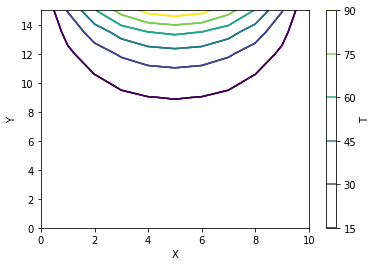

In [2]:
from numpy import *
from matplotlib.pyplot import *
import time

def gausselim(a,b):
    n = b.size
    f = zeros(n, float)
    for k in range(0,n-1):
        for i in range(k+1,n):
            em = a[i,k]/a[k,k]
            a[i,k] = em
            b[i] -= em*b[k]
            for j in range(k+1,n):
                a[i,j] -= em*a[k,j]

    f[n-1] = b[n-1]/a[n-1,n-1]

    for i in range(n-2,-1,-1):
        f[i] = b[i]
        for j in range(n-1,i,-1):
            f[i] -= a[i,j]*f[j]
        f[i] = f[i]/a[i,i]
    return f

def conjgrad(a,b,eps):
    n = b.size
    imax = 10*n
    f = zeros(n, float)
    r0 = b - dot(a,f)
    p = r0
    for i in range(0, imax):
        alpha = dot(r0,r0)/dot(p,dot(a,p))
        f = f + alpha*p
        r1 = r0 - alpha*dot(a,p)
        res = linalg.norm(r1)
        beta = dot(r1,r1)/dot(r0,r0)
        p = r1 + beta*p
        r0 = r1
        print (i, res)
        if res < eps: return f
    print ("not converged!")
    return f

def gauss_seidel(T,nx,ny,beta,eps):
    itrmax = 1000
    bsq = beta*beta
    dnm = 0.5/(1.0+bsq)
    for itr in range(0, itrmax):
        err = 0.0
        for j in range(1, ny):
            for i in range(1, nx):
                new = (T[i+1,j]+bsq*T[i,j+1]+T[i-1,j]+bsq*T[i,j-1])*dnm
                err = max(abs(T[i,j]-new),err)
                T[i,j] = new
        if (err < eps): return itr
    return itrmax

#start = time.time()

# definition of computational domain
w = 10.0
h = 15.0
nx = 10
ny = 10
nmax = (nx-1)*(ny-1)
dx = w/nx
dy = h/ny
beta = dx/dy
bsq = beta*beta
dnm = 0.5/(1.0+bsq)

# initialization
x = linspace(0, w, nx+1)
y = linspace(0, h, ny+1)
b = zeros(nmax, float)
a = zeros((nmax,nmax), float)
T = zeros((nx+1,ny+1), float)

# Dirichlet boundary condition for upper boundary (j = ny)
for i in range(0, nx+1):
    T[i,ny] = 100.0*sin(pi*x[i]/w)

n = 0
for j in range(1, ny):
    for i in range(1, nx):
        # dnm = denominator eq 9.24
        if ( j==1 ):
            b[n] += bsq*dnm*T[i,j-1]      # lower boundary
        else:
            a[n-nx+1,n] = -bsq*dnm
        if ( i==1):
            b[n] += dnm*T[i-1,j]          # left boundary
        else:
            a[n-1,n] = -dnm
        if ( i==nx-1 ):
            b[n] += dnm*T[i+1,j]          # right boundary
        else:
            a[n+1,n] = -dnm
        if ( j==ny-1 ):
            b[n] += bsq*dnm*T[i,j+1]      # upper boundary
        else:
            a[n+nx-1,n] = -bsq*dnm
        a[n,n] = 1.0
        n += 1

T_ge = T
T_cg = T
T_gs = T

# ====================
# conjgrad
start_cg = time.time()
eps = 1e-8
f_cg = conjgrad(a,b,eps)
n = 0
for j in range(1, ny):
    for i in range(1, nx):
        T_cg[i,j] = f_cg[n]
        n += 1

# obtained solution in standard output
#print ("solution of CG =",T_cg)
time_cg = time.time() - start_cg
print ("elapsed time CG =",time_cg)

# ====================
# Gauss-Elim
start_ge = time.time()
f_ge = gausselim(a,b)
n = 0
for j in range(1, ny):
    for i in range(1, nx):
        T_ge[i,j] = f_ge[n]
        n += 1

# obtained solution in standard output
#print ("solution of GE =",T_ge)
time_ge = time.time() - start_ge
print ("elapsed time GE =",time_ge)

# ====================
# Gauss-Saidel
start_gs = time.time()
eps = 1e-8
itr = gauss_seidel(T_gs,nx,ny,beta,eps)

# obtained solution in standard output
#print ("solution of GS=",T_gs)
time_gs = time.time() - start_gs
print ("max iteration",itr)
print ("elapsed time GS=",time_gs)

# ====================
# Time printing
print('elapsed time CG, GE, GS : ',time_cg, time_ge, time_gs)

#print(T_cg - T_gs)

# plot setting
X, Y = meshgrid(x,y,indexing='ij')
contour(X,Y,T_cg)
contour(X,Y,T_ge)
contour(X,Y,T_gs)
xlabel('X')
ylabel('Y')
cbar=colorbar()
cbar.set_label('T')
show()


30 x 30

elapsed time CG, GE, GS :  0.0931398868560791 109.24095582962036 0.01150822639465332



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CG, GE, GS
times = np.array[
    [0.0931398868560791, 109.24095582962036, 0.01150822639465332], # 30 x 30
]